In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [92]:
predictions_df = pd.read_pickle('../data/predictions/transformer_classifier_USDJPY-5m-20210101-20241231_NORM.pkl')

In [93]:
predictions_df.head()

,t1,trgt,ret,bin,bin_class,prob_0,prob_1,prob_2,prediction,pred_side,confidence
timestamp,,,,,,,,,,,
2021-01-07 09:10:00,2021-01-07 09:45:00,0.000432,0.000435,1.0,2.0,0.435936,0.095410,0.468654,2,1,0.468654
2021-01-07 09:50:00,2021-01-07 10:30:00,0.000422,0.000531,1.0,2.0,0.419995,0.110621,0.469384,2,1,0.469384
2021-01-07 10:35:00,2021-01-07 12:00:00,0.000411,0.000690,1.0,2.0,0.453976,0.088864,0.457160,2,1,0.457160
2021-01-07 12:00:00,2021-01-07 12:20:00,0.000446,-0.000603,-1.0,0.0,0.460023,0.082298,0.457678,0,-1,0.460023
2021-01-07 12:35:00,2021-01-07 13:10:00,0.000422,-0.000540,-1.0,0.0,0.449889,0.062247,0.487864,2,1,0.487864


In [101]:
predictions_df['bin_class'].value_counts()

bin_class
2.0    7040
0.0    6791
1.0    3181
Name: count, dtype: int64

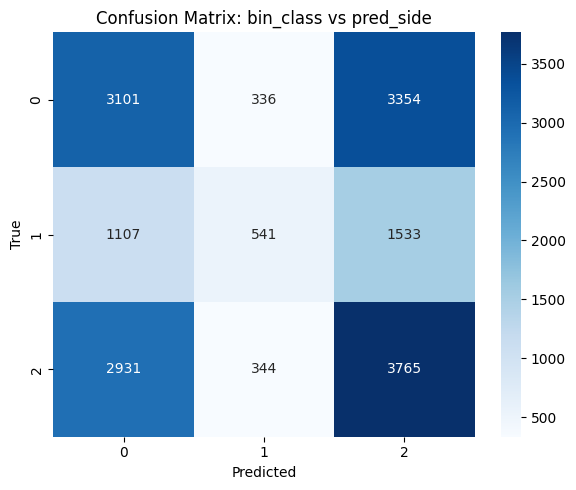

In [94]:
# 將類別轉為整數型別
y_true = predictions_df["bin_class"].astype(int)
y_pred = predictions_df["prediction"].astype(int)

# 計算混淆矩陣
cm = confusion_matrix(y_true, y_pred, labels=[0, 1, 2])


# 繪圖
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix: bin_class vs pred_side")
plt.tight_layout()
plt.show()


In [98]:
filter_df = predictions_df[predictions_df['confidence']>0.6]

In [99]:
filter_df['bin_class'].value_counts()

bin_class
1.0    121
2.0     41
0.0     30
Name: count, dtype: int64

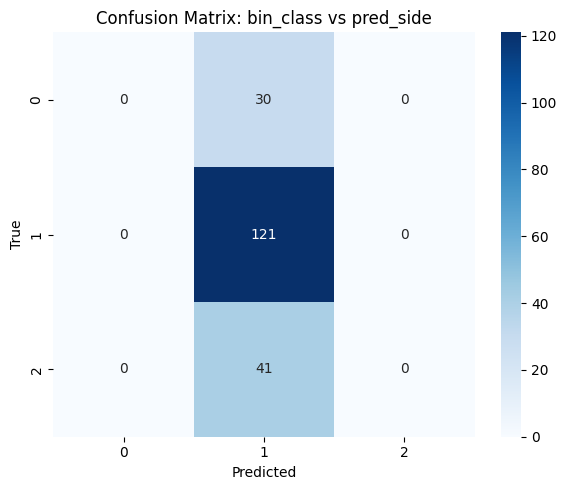

In [100]:
# 將類別轉為整數型別
y_true = filter_df["bin_class"].astype(int)
y_pred = filter_df["prediction"].astype(int)

# 計算混淆矩陣
cm = confusion_matrix(y_true, y_pred, labels=[0, 1, 2])


# 繪圖
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix: bin_class vs pred_side")
plt.tight_layout()
plt.show()
